# Comparing simulated trajectories from coupled and uncoupled simulation

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from datetime import timedelta, datetime
from geopy import distance

## Loading trajectory data

In [2]:
datapath = '/Users/siren/IMMERSE_waves/develop-mac/data/'
trajpath = datapath + 'Traj-uncoupled.nc'
trajpath_c = datapath + 'Traj-coupled.nc'
trajpath_csd = datapath + 'Traj-coupled-sd.nc'

In [3]:
traj_nc = xr.open_dataset(trajpath)
traj_c = xr.open_dataset(trajpath_c)
traj_csd = xr.open_dataset(trajpath_csd)

In [29]:
traj_nc

<xarray.Dataset>
Dimensions:     (traj: 56, obs: 31)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float64 42.0 41.7 41.47 41.4 ... 41.83 41.88 41.98
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

!!! QUESTION: Why is there depth output in trajectory file even though trajectories were calculated only horizontally? Is that really necessary?

## Quantifying differences between trajectory paths

In [4]:
diff_nc_c = traj_nc - traj_c
diff_nc_csd = traj_nc - traj_csd
diff_c_csd = traj_c - traj_csd

In [72]:
def calc_dist(lat1,lon1,lat2,lon2,ntraj,nobs): 
    dist = lat1.copy()
    for i in range(ntraj):
        for j in range(nobs):
            dist[i,j] = distance.distance((lat1.isel(traj=i,obs=j), lon1.isel(traj=i,obs=j)),
                                          (lat2.isel(traj=i,obs=j), lon2.isel(traj=i,obs=j))).km
    return dist

dist_nc_c = calc_dist(traj_nc.lat, traj_nc.lon, traj_c.lat, traj_c.lon, 56,31)
dist_nc_csd = calc_dist(traj_nc.lat, traj_nc.lon, traj_csd.lat, traj_csd.lon, 56,31)
dist_c_csd = calc_dist(traj_c.lat, traj_c.lon, traj_csd.lat, traj_csd.lon, 56,31)

use shape

!!! QUESTION: How to code this more efficiently?

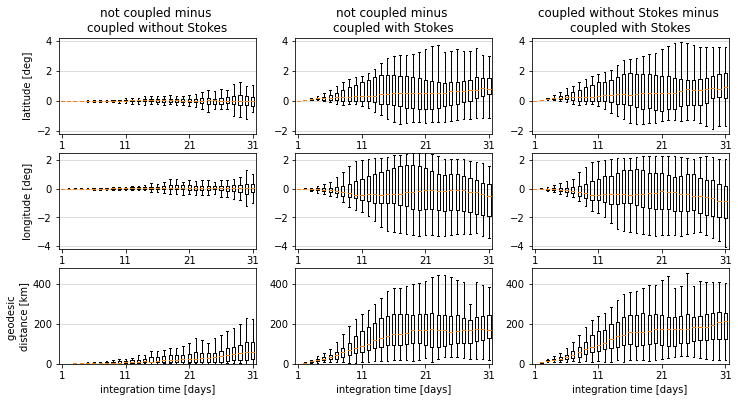

In [109]:
latmin = -2.2
latmax = 4.2
lonmin = -4.2
lonmax = 2.5
distmin = 0
distmax = 480
tticks = (1,11,21,31)
tticklabs = ('1', '11', '21', '31')


fig, axs = plt.subplots(3,3,figsize=(12,6))

axs[0,0].boxplot(diff_nc_c.lat,0,'')
axs[0,0].set_ylim(latmin,latmax)
axs[0,0].set_ylabel('latitude [deg]')
axs[0,0].set_title('not coupled minus \ncoupled without Stokes')
axs[0,0].set_xticks(tticks)
axs[0,0].set_xticklabels(tticks)
axs[0,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')

axs[0,1].boxplot(diff_nc_csd.lat,0,'')
axs[0,1].set_ylim(latmin,latmax)
axs[0,1].set_title('not coupled minus \ncoupled with Stokes')
axs[0,1].set_xticks(tticks)
axs[0,1].set_xticklabels(tticks)
axs[0,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[0,2].boxplot(diff_c_csd.lat,0,'')
axs[0,2].set_ylim(latmin,latmax)
axs[0,2].set_title('coupled without Stokes minus \ncoupled with Stokes')
axs[0,2].set_xticks(tticks)
axs[0,2].set_xticklabels(tticks)
axs[0,2].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[1,0].boxplot(diff_nc_c.lon,0,'')
axs[1,0].set_ylim(lonmin,lonmax)
axs[1,0].set_ylabel('longitude [deg]')
axs[1,0].set_xticks(tticks)
axs[1,0].set_xticklabels(tticks)
axs[1,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[1,1].boxplot(diff_nc_csd.lon,0,'')
axs[1,1].set_ylim(lonmin,lonmax)
axs[1,1].set_xticks(tticks)
axs[1,1].set_xticklabels(tticks)
axs[1,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[1,2].boxplot(diff_c_csd.lon,0,'')
axs[1,2].set_ylim(lonmin,lonmax)
axs[1,2].set_xticks(tticks)
axs[1,2].set_xticklabels(tticks)
axs[1,2].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[2,0].boxplot(dist_nc_c,0,'')
axs[2,0].set_ylim(distmin, distmax)
axs[2,0].set_ylabel('geodesic \ndistance [km]')
axs[2,0].set_xlabel('integration time [days]')
axs[2,0].set_xticks(tticks)
axs[2,0].set_xticklabels(tticks)
axs[2,0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[2,1].boxplot(dist_nc_csd,0,'')
axs[2,1].set_ylim(distmin, distmax)
axs[2,1].set_xlabel('integration time [days]')
axs[2,1].set_xticks(tticks)
axs[2,1].set_xticklabels(tticks)
axs[2,1].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


axs[2,2].boxplot(dist_c_csd,0,'')
axs[2,2].set_ylim(distmin, distmax)
axs[2,2].set_xlabel('integration time [days]')
axs[2,2].set_xticks(tticks)
axs[2,2].set_xticklabels(tticks)
axs[2,2].yaxis.grid(True, linestyle='-', which='major', color='lightgrey')


plt.show()

Results:
1) Only little differences between trajectories simulated (i) with current velocities from the non-coupled simulation vs (ii) current velocities from the coupled simulation without considering Stokes drift. The geodesic distance between particles released at same point and same time in both simulations at the end of the integration (30 days) is for most of the particle pairs smaller than 100 km, individual particle pairs are however more than 200 km apart.

2) Much larger differences can be found between trajectories simulated (i) with current velocities from the non-coupled simulation vs (ii) current velocities from the coupled simulation with considering Stokes drift. The geodesic distance at the end of the integration (30 days) is for most of the particle pairs larger than 100 km, individual particle pairs are more than 400 km apart. Interestingly, there is a tendency of particles advected without Stokes to be found more northern (and closer to the coast) and slightly more western than particles advected with Stokes. Finally it is to note that distances overall steadily increase the first 15-20 days of the integration, but afterwards remain rather constant.

3) The differences between trajectories simulated (i) with current velocities from the coupled simulation without considering Stokes drift vs (ii) current velocities from the coupled simulation with considering Stokes drift show a very similar pattern as described in 2). This supports the general notion that the main difference between trajectories siumalted with the coupled vs uncoupled simulations arises from the Stokes drift (with only minor contribution for changes due to wave-current interaction).